# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Reading in Dataset
* Bringing in the downloaded training dataset from Kaggle
* Visualizing the dataset (first 10 rows)

In [2]:
## reading the training data into the program
train = pd.read_csv('/Users/cerser5/House_Project/house-prices-advanced-regression-techniques/train.csv')
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Data Preprocessing and Data Cleaning

In [3]:
## Dropping the ID column from the data
train = train.drop('Id', axis = 1)
train.head(1)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


## Showing the distribution of the data
* Learning about how the data is spread out, whether it is categorical or numerical values. Also shows null value counts
* Generating descriptive statistics of the numerical data

In [4]:
#showing the types of columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Cleaning Data
* Showing the unique values 
* Finding the amount of data missing
* Dropping or imputing the missing data

In [6]:
# Calculate the total number of missing values in each column
miss_val = train.isnull().sum()

# Filter out columns with no missing values
miss_val = miss_val[miss_val > 0]

# Get columns with missing values
columns_with_missing_values = miss_val.index

# Iterates over each column with missing values
for column in columns_with_missing_values:
    # Get the unique values in the current column
    unique_values = train[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()  # Added a blank line for readability

Column: LotFrontage
Unique Values:
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

Column: Alley
Unique Values:
[nan 'Grvl' 'Pave']

Column: MasVnrType
Unique Values:
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]

Column: MasVnrArea
Unique Values:
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+

In [7]:
# Find columns with missing values and their percent missing
train.isnull().sum()                                                     
miss_val = train.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=train.isnull().sum().sort_values(ascending=False), columns=['MissingCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissingCount.apply(lambda x : '{:.2f}'.format(float(x)/train.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissingCount > 0]
miss_val

,MissingCount,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [8]:
# Dropping columns with significant amount of missing data
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)
train.shape

(1460, 75)

In [9]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)

In [10]:
# Calculate the percentage of rows with missing values
percentage_missing = (train.isnull().sum(axis=1) / train.shape[1]) * 100

# Filter rows with missing values
rows_with_missing = train[percentage_missing > 10]

# Calculate the percentage of data that would be deleted
percentage_deleted = (len(rows_with_missing) / len(train)) * 100

print(f"Percentage of data to be deleted: {percentage_deleted:.2f}%")

Percentage of data to be deleted: 0.48%


In [11]:
train.dropna(inplace = True)
train.shape

(1338, 75)

## Finding correlation of the data

In [12]:
# Picking specific columns im interested in seeing the correlation with the target variable
coi = ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
# Calculate the correlation matrix
correlation_matrix = train[coi].corr()

# Display the correlation matrix
print(correlation_matrix)

             1stFlrSF  2ndFlrSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1stFlrSF     1.000000 -0.220279    0.450366    0.094065   0.318097   
2ndFlrSF    -0.220279  1.000000   -0.151876   -0.109254  -0.016117   
BsmtFinSF1   0.450366 -0.151876    1.000000   -0.064855  -0.552809   
BsmtFinSF2   0.094065 -0.109254   -0.064855    1.000000  -0.233449   
BsmtUnfSF    0.318097 -0.016117   -0.552809   -0.233449   1.000000   
TotalBsmtSF  0.893110 -0.234070    0.505000    0.083184   0.363767   
GarageArea   0.500071  0.124564    0.284095   -0.053411   0.195401   
WoodDeckSF   0.233200  0.081291    0.187178    0.061206  -0.020711   
OpenPorchSF  0.226615  0.202791    0.107561    0.004211   0.122171   
SalePrice    0.604714  0.311354    0.359677   -0.031226   0.191689   

             TotalBsmtSF  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  
1stFlrSF        0.893110    0.500071    0.233200     0.226615   0.604714  
2ndFlrSF       -0.234070    0.124564    0.081291     0.202791   0.311354  
Bsmt

In [13]:
corr = train.corr()
corr["SalePrice"].sort_values(ascending=False).head(10)

/var/folders/8z/scpggshn6xnf6ktckbg7l7mm0000gn/T/ipykernel_38250/994387007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


SalePrice       1.000000
OverallQual     0.783546
GrLivArea       0.711706
GarageCars      0.640154
GarageArea      0.607535
1stFlrSF        0.604714
TotalBsmtSF     0.602042
FullBath        0.569313
TotRmsAbvGrd    0.551821
YearBuilt       0.504297
Name: SalePrice, dtype: float64

/var/folders/8z/scpggshn6xnf6ktckbg7l7mm0000gn/T/ipykernel_38250/2974060189.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


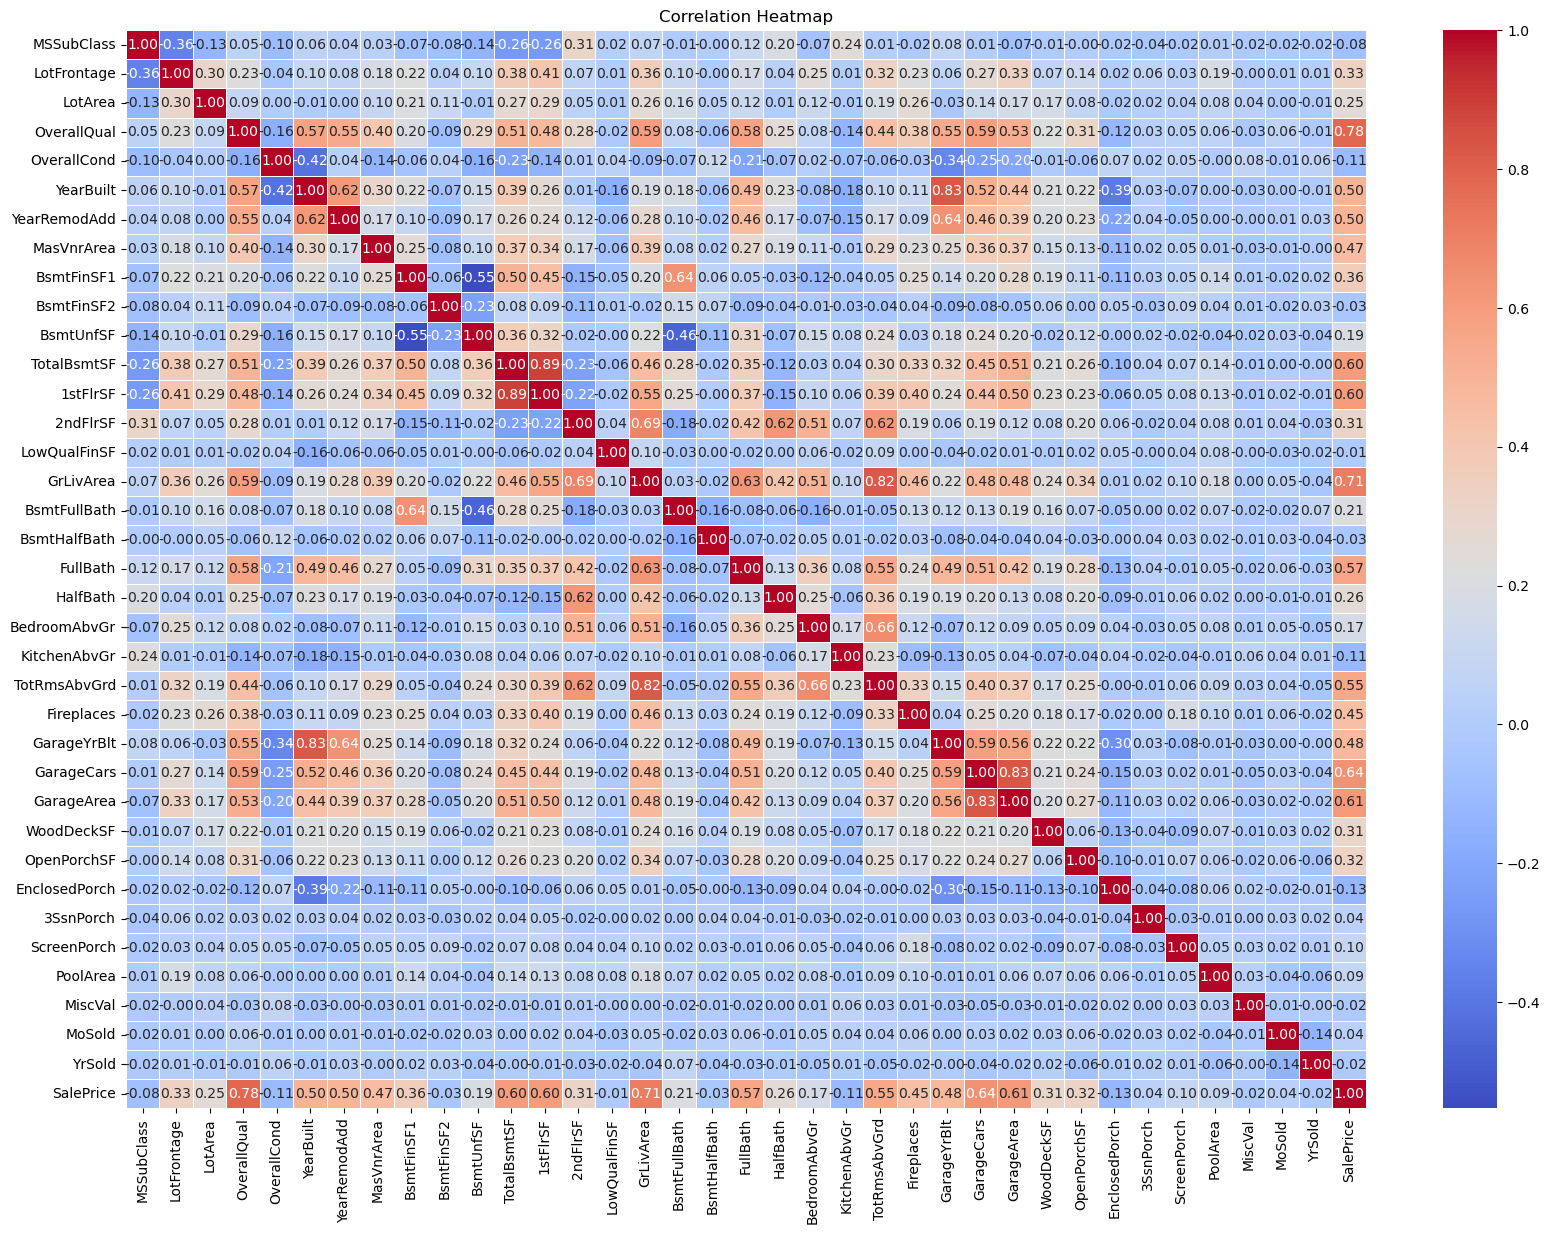

In [14]:
corr_matrix = train.corr()

plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Identify categorical and numerical columns
categorical_columns = train.select_dtypes(include=['object']).columns
numerical_columns = train.select_dtypes(include=['number']).columns

# Handle categorical data
for column in categorical_columns:
    if train[column].isnull().any():
        train[column].fillna('Missing', inplace=True)

# Handle numerical data
for column in numerical_columns:
    if train[column].isnull().any():
        mean_value = train[column].mean()
        train[column].fillna(mean_value, inplace=True)

In [16]:
# Getting only data with numbers
train_num = train.select_dtypes(include = ['int64', 'float64'])
train_num.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
print(train_num['SalePrice'].describe())

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64


### Plotting the distribution of Sale Price

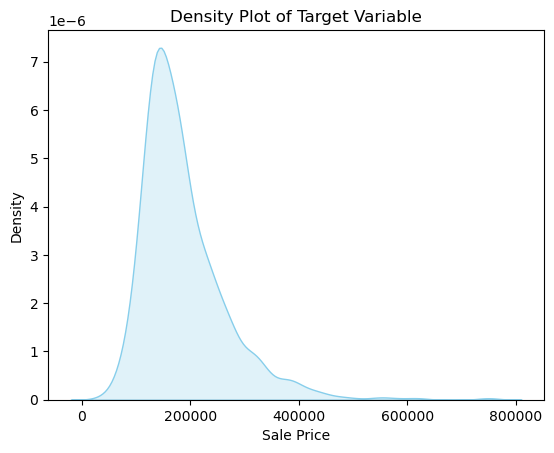

In [18]:
# Density Plot to see the spread of the Sale Price
sns.kdeplot(train['SalePrice'], fill=True, color='skyblue')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Density Plot of Target Variable')
plt.show()

The data is skewed to the right, indicating that the distribution of house prices is positively skewed, with relatively fewer high-priced houses and a majority of houses clustered towards lower price ranges.

### Transforming Sale Price data

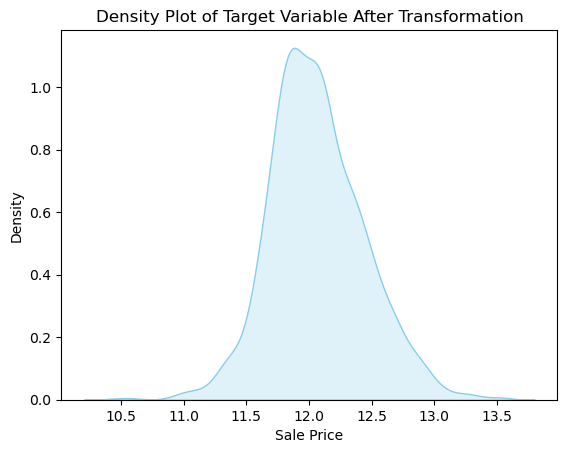

In [19]:
train['SalePrice'] = np.log1p(train['SalePrice'])

# Density Plot to see the spread of the Sale Price after transformation
sns.kdeplot(train['SalePrice'], fill=True, color='skyblue')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Density Plot of Target Variable After Transformation')
plt.show()

Usig a logarithmic transformation to reduce the skewness of the data and make it more symmetrically distributed. This will make the data more uniform and also make it easier on the model to deal with more linear data. 

### Checking for skewness in the data

In [20]:
# Importing necessary library to calculate skewness
from scipy.stats import skew

# Selecting only numerical features for skewness calculation
numeric_features = train.dtypes[train.dtypes != 'object'].index

# Calculating skewness for each numerical feature
skewed_features = train[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)

# Selecting features with high skewness (absolute skewness > 0.5)
high_skew = skewed_features[abs(skewed_features) > 0.5]

# Printing the list of highly skewed features along with their skewness values
print(high_skew)

MiscVal          24.604954
PoolArea         14.171921
LotArea          11.924736
LowQualFinSF     10.554965
3SsnPorch        10.085230
KitchenAbvGr      5.936896
BsmtFinSF2        4.141869
ScreenPorch       3.912455
BsmtHalfBath      3.843594
EnclosedPorch     3.201692
MasVnrArea        2.579788
LotFrontage       2.476736
OpenPorchSF       2.248428
TotalBsmtSF       2.211546
BsmtFinSF1        1.691498
WoodDeckSF        1.480078
GrLivArea         1.428703
1stFlrSF          1.395864
MSSubClass        1.390340
BsmtUnfSF         0.934314
OverallCond       0.896535
GarageArea        0.806173
2ndFlrSF          0.768284
TotRmsAbvGrd      0.672609
Fireplaces        0.570198
HalfBath          0.553392
YearRemodAdd     -0.562713
GarageYrBlt      -0.668706
YearBuilt        -0.677206
dtype: float64


This process is essential for identifying features that may exhibit non-normal distributions, which can impact the performance of certain machine learning models. By detecting and addressing skewness, we aim to improve the model's predictive accuracy and ensure better model performance.

In [21]:
#Transforming skewed columns
for feature in high_skew.index:
    train[feature] = np.log1p(train[feature])

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

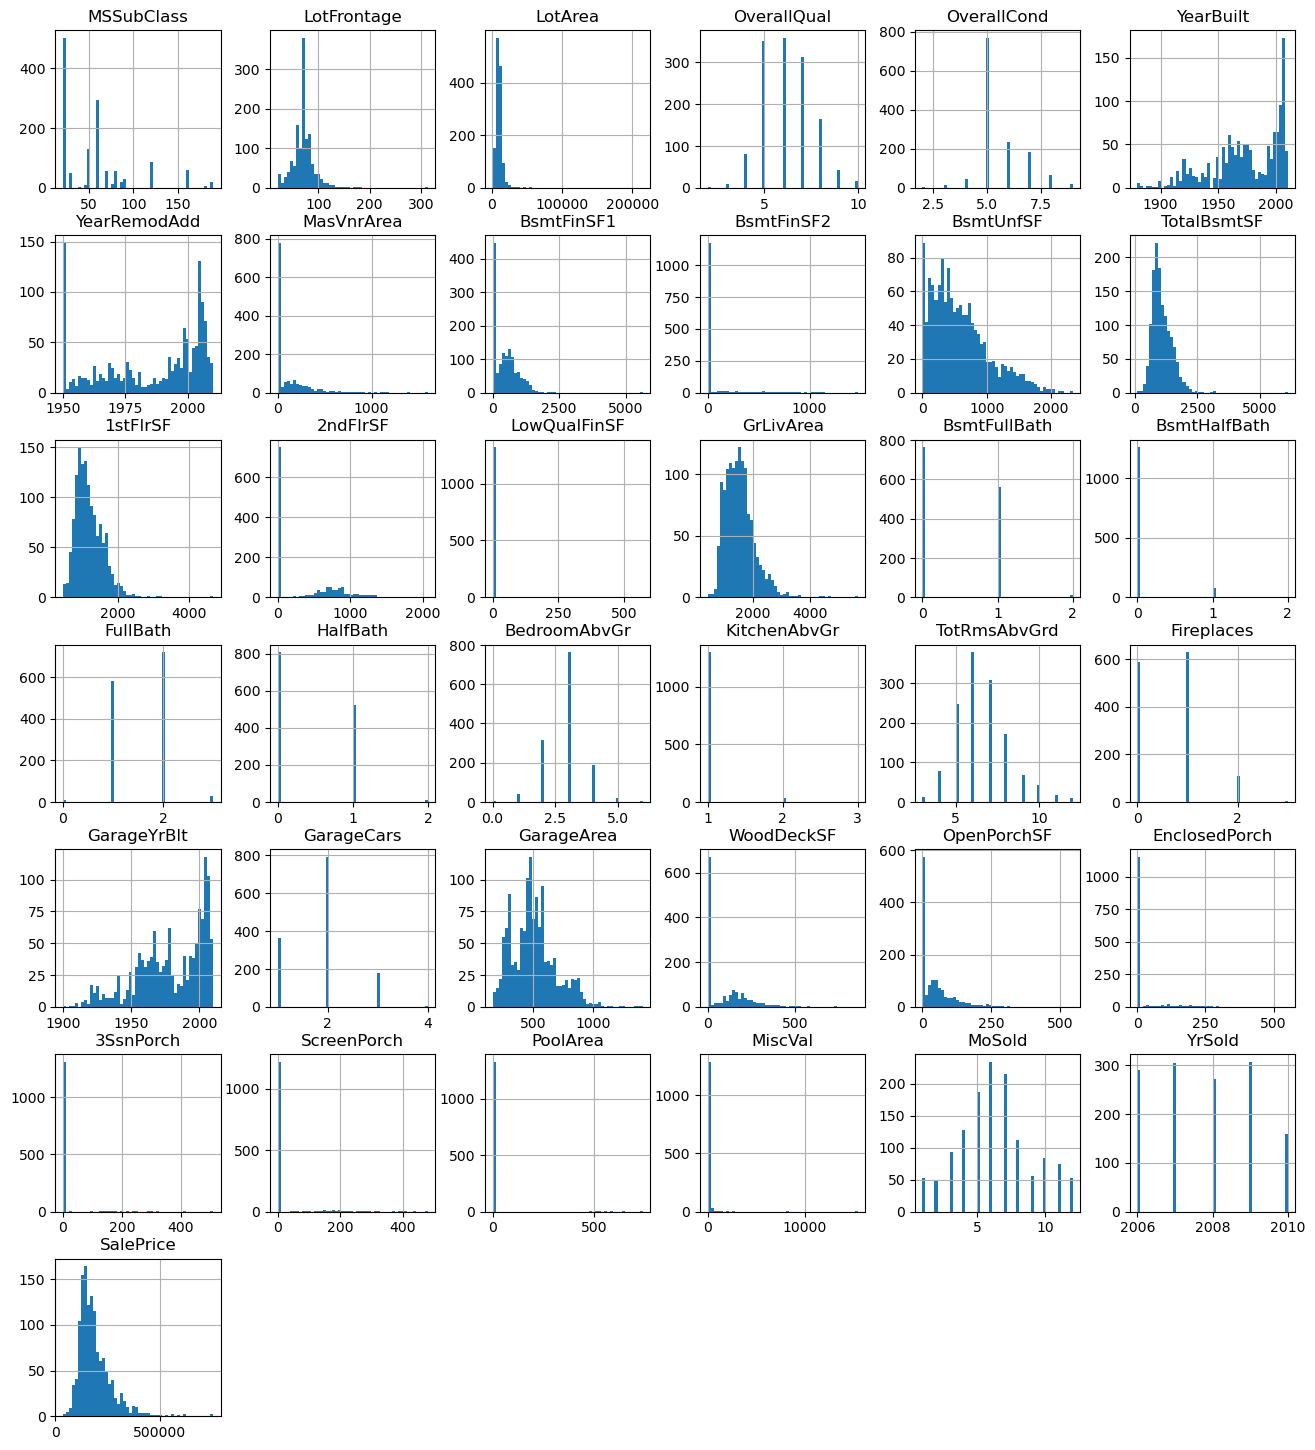

In [22]:
## plotting the numerical data
train_num.hist(figsize = (16,18), bins = 50, xlabelsize = 10, ylabelsize = 10)

## Splitting the data

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the entire dataset
encoded_df = train.copy()  # Assuming train_df is your DataFrame
for column in categorical_columns:
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

# Split the encoded dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop(columns=['SalePrice']), 
                                                    encoded_df['SalePrice'], 
                                                    test_size=0.2, 
                                                    random_state=42)

print("Number of examples in training set:", len(X_train))
print("Number of examples in testing set:", len(X_test))

Number of examples in training set: 1070
Number of examples in testing set: 268


# Random Forest

Feature ranking:
1. Feature 'OverallQual': 0.5318674419592311
2. Feature 'GrLivArea': 0.13563131016015412
3. Feature 'TotalBsmtSF': 0.042121593810313815
4. Feature 'GarageCars': 0.033656559567540635
5. Feature '1stFlrSF': 0.0322498611619051
6. Feature 'YearBuilt': 0.02374903918079826
7. Feature 'GarageArea': 0.022900824342881997
8. Feature 'BsmtFinSF1': 0.017927836391961893
9. Feature 'YearRemodAdd': 0.012967577724086042
10. Feature 'LotArea': 0.012171856968084356
11. Feature 'GarageType': 0.009686514594251355
12. Feature 'MSZoning': 0.00840414403883982
13. Feature '2ndFlrSF': 0.007945025485313445
14. Feature 'OverallCond': 0.006830614481907934
15. Feature 'LotFrontage': 0.006667900208036223
16. Feature 'Neighborhood': 0.006359075645212799
17. Feature 'BsmtQual': 0.005640827170654696
18. Feature 'BsmtUnfSF': 0.00519447628021076
19. Feature 'Fireplaces': 0.004780619142841702
20. Feature 'GarageYrBlt': 0.004483393333104073
21. Feature 'MasVnrArea': 0.004080542285728785
22. Feature 'WoodD

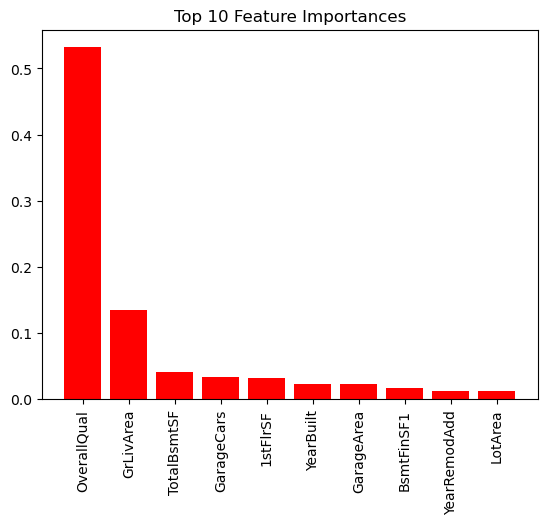

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a Random Forest regressor
rf_regressor = RandomForestRegressor()

# Fit the regressor to the training data
rf_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

feature_names = X_train.columns

# Print feature ranking with names
print("Feature ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature '{feature_names[idx]}': {feature_importances[idx]}")

# Plot feature importances
top_indices = indices[:10]
top_feature_importances = feature_importances[top_indices]
top_feature_names = [feature_names[idx] for idx in top_indices]

plt.figure()
plt.title("Top 10 Feature Importances")
plt.bar(range(10), top_feature_importances, color="r", align="center")
plt.xticks(range(10), top_feature_names, rotation=90)
plt.show()

## Random Forest Testing

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Select features based on top importance
selected_features = [15, 44, 58, 36, 41, 59, 17, 32, 18, 3]

# Prepare data
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Initialize and train the model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_selected, y_train)

# Make predictions
predictions = rf_regressor.predict(X_test_selected)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.10203934849929398


In [26]:
from sklearn.metrics import mean_squared_error

# Make predictions
predictions = rf_regressor.predict(X_test_selected)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.02538431355054237


In [27]:
# Reverse the transformation for both actual and predicted sale prices
actual_prices = np.expm1(y_test)
predicted_prices = np.expm1(predictions)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual_SalePrice': actual_prices, 'Predicted_SalePrice': predicted_prices})
print(comparison_df)

      Actual_SalePrice  Predicted_SalePrice
832           237000.0        222834.431660
965           178900.0        173181.139163
969           140000.0        133986.391090
1411          140000.0        147411.151813
284           179200.0        182293.078169
...                ...                  ...
119           163990.0        173860.773945
628           135000.0        189630.917408
585           369900.0        342685.164018
593           140000.0        145465.421304
918           238000.0        241733.468942

[268 rows x 2 columns]


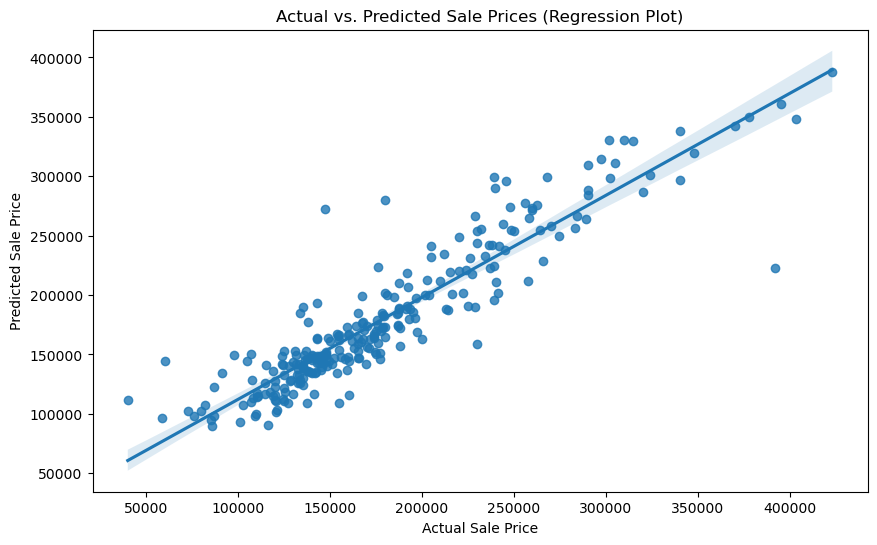

In [28]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual_SalePrice', y='Predicted_SalePrice', data=comparison_df)
plt.title('Actual vs. Predicted Sale Prices (Regression Plot)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

# Multi-linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()

# Fit the model to the training data
mlr_model.fit(X_train, y_train)

# Get the coefficients (weights) assigned to each feature
coefficients = pd.DataFrame({'feature': X_train.columns, 'coefficient': mlr_model.coef_})

# Sort the coefficients by absolute value to get feature importance
mlr_feature_importance = coefficients.sort_values(by='coefficient', ascending=False)

print(mlr_feature_importance.head(10))

         feature  coefficient
17     YearBuilt     2.975916
18  YearRemodAdd     1.503437
44     GrLivArea     0.520724
4         Street     0.486813
16   OverallCond     0.292532
36   TotalBsmtSF     0.100176
58    GarageCars     0.070888
3        LotArea     0.067288
15   OverallQual     0.057756
9      LandSlope     0.057068


In [30]:
mlr_top_features = coefficients.nlargest(10, 'coefficient')  # Select top 5 features with highest coefficients

# Test the model using selected features
X_train_selected = X_train[mlr_top_features['feature']]
X_test_selected = X_test[mlr_top_features['feature']]

# Fit the model on selected features
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

# Make predictions
mlr_predictions = model_selected.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, mlr_predictions)
print(f"Mean Squared Error: {mse:.3f}")

Mean Squared Error: 0.023


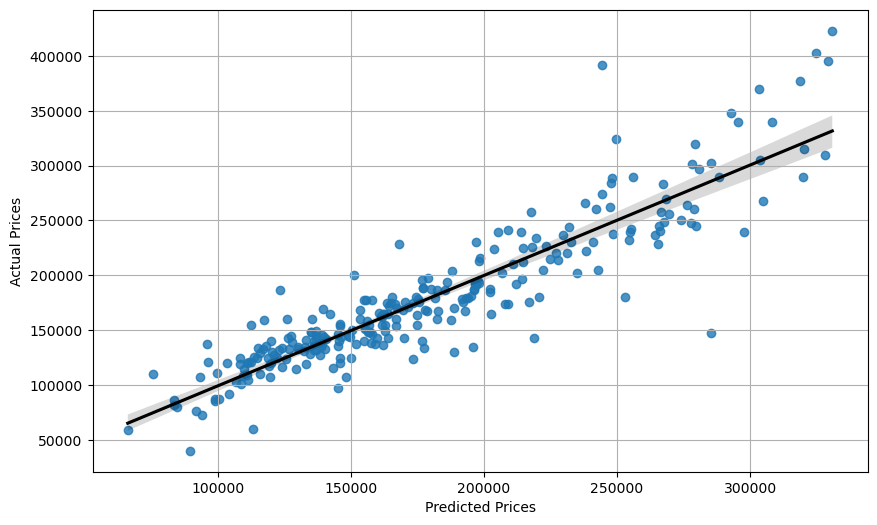

In [31]:
y_test = np.expm1(y_test)
mlr_predictions = np.expm1(mlr_predictions)

plt.figure(figsize=(10, 6))
sns.regplot(x=mlr_predictions, y=y_test, line_kws={'color': 'black'})
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.grid(True)

# XG Boost

In [32]:
from xgboost import XGBRegressor

# Initialize an XGBRegressor object
xgb_regressor = XGBRegressor()

# Fit the regressor to the training data
xgb_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = xgb_regressor.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for i, idx in enumerate(indices):
    print(f"{i + 1}. Feature {idx}: {feature_importances[idx]}")

# Make predictions
predictions = xgb_regressor.predict(X_test)


Feature ranking:
1. Feature 15: 0.4607512056827545
2. Feature 58: 0.0807931050658226
3. Feature 39: 0.07973278313875198
4. Feature 28: 0.06534279137849808
5. Feature 44: 0.03506628796458244
6. Feature 54: 0.02288457565009594
7. Feature 55: 0.020391298457980156
8. Feature 50: 0.020092574879527092
9. Feature 36: 0.01975257694721222
10. Feature 6: 0.017548108473420143
11. Feature 1: 0.014451577328145504
12. Feature 62: 0.010095835663378239
13. Feature 57: 0.010087965056300163
14. Feature 41: 0.010021201334893703
15. Feature 17: 0.00948084332048893
16. Feature 53: 0.008327876217663288
17. Feature 60: 0.00784517452120781
18. Feature 16: 0.007636259309947491
19. Feature 18: 0.0058068772777915
20. Feature 32: 0.005654061213135719
21. Feature 51: 0.005332685075700283
22. Feature 52: 0.005060738883912563
23. Feature 25: 0.004765755031257868
24. Feature 73: 0.004676916636526585
25. Feature 31: 0.004529530648142099
26. Feature 30: 0.003983797039836645
27. Feature 45: 0.0037666603457182646
28. Fea

In [33]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the MSE and RMSE
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 36222506086.94617
Root Mean Squared Error (RMSE): 190322.11139787768


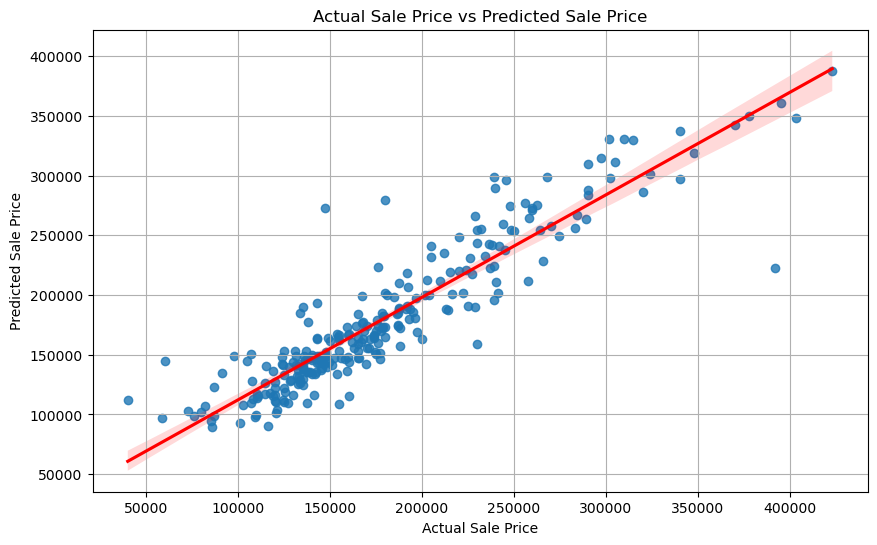

In [34]:
# Plot the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual_SalePrice', y='Predicted_SalePrice', data=comparison_df, line_kws={'color': 'red'})
plt.title('Actual Sale Price vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)
plt.show()

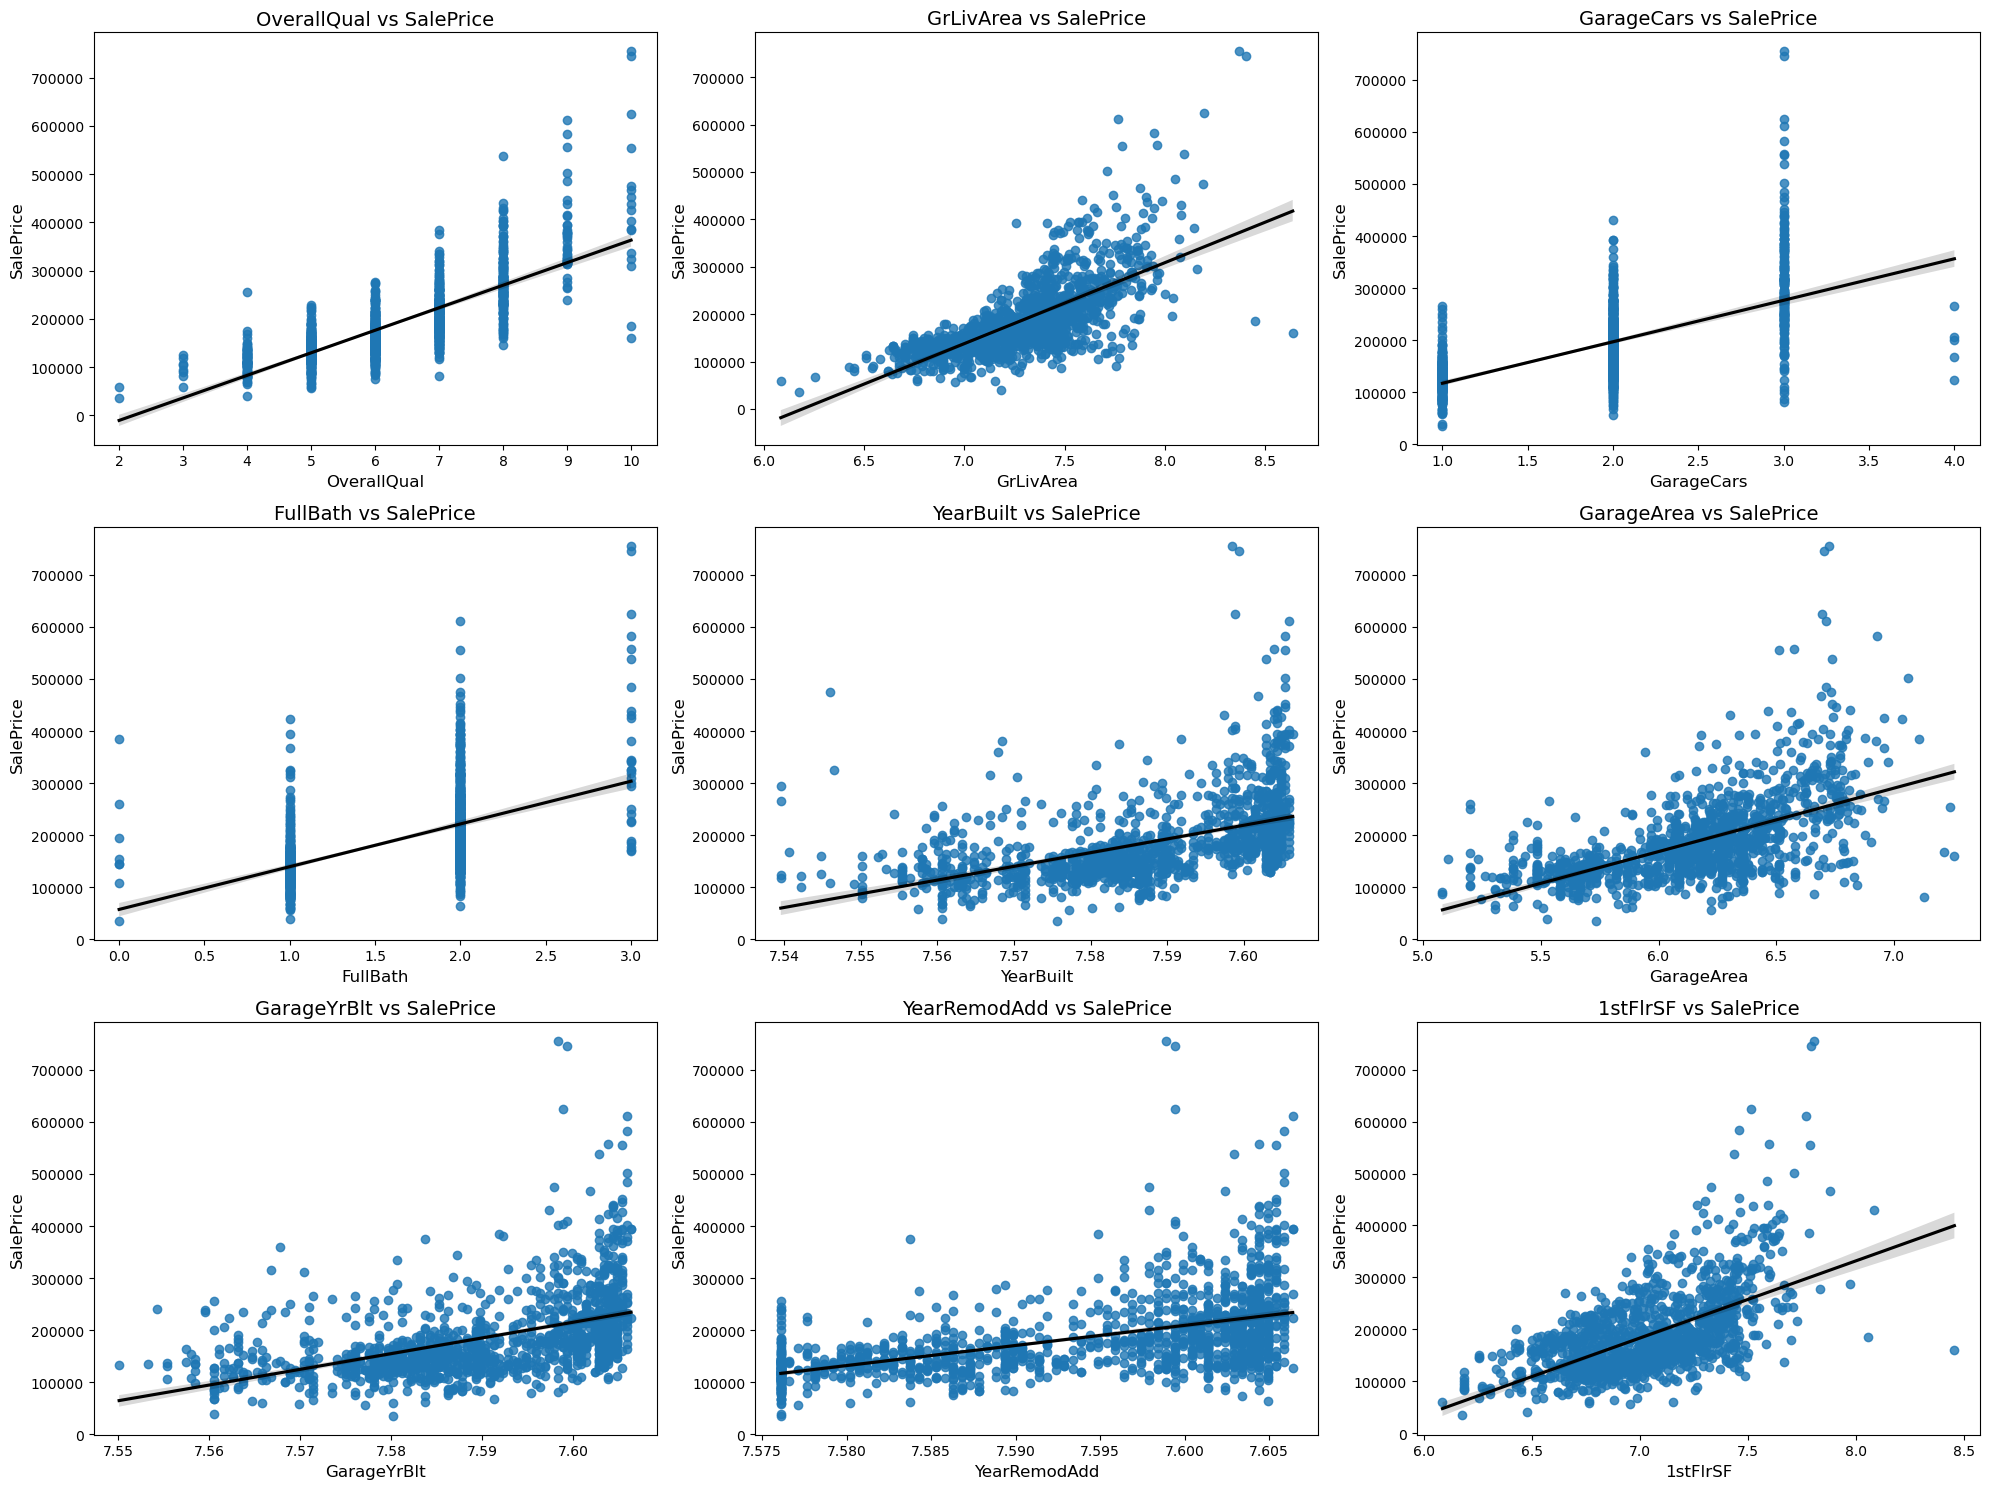

In [35]:
best_features = ["OverallQual", "GrLivArea", "GarageCars", "FullBath", "YearBuilt", "GarageArea", "GarageYrBlt", "YearRemodAdd", "1stFlrSF"]

# Convert SalePrice back to its original scale
train["SalePrice"] = np.expm1(train["SalePrice"])

plt.figure(figsize=(20, 15))

# Iterate over the selected features
for i, feature in enumerate(best_features, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=train[feature], y=train["SalePrice"], line_kws={'color': 'black'})
    plt.title(f"{feature} vs SalePrice", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("SalePrice", fontsize=12)

plt.tight_layout()
plt.show()